<a href="https://colab.research.google.com/github/convenience-tinashe-chibatamoto/Projects/blob/main/Titanic%20Survival%20Prediction%20Using%20Several%20Different%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Metrics
from sklearn import metrics

## Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [3]:
## Models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

**In an earlier example, I used a simple logistic regression algorithm to predict the survival of those on board the titanic, and did so with a 75% accuracy. In this example, I'm using a couple of different algorithms for the sake of comparison**


In [4]:
# Loading the Titanic dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab Datasets/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Ticket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Cabin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sex'].value_counts()
    for x_label, grp in _df_4.groupby('Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Name')
_ = plt.ylabel('Sex')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ticket'].value_counts()
    for x_label, grp in _df_5.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Ticket')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cabin'].value_counts()
    for x_label, grp in _df_6.groupby('Ticket')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ticket')
_ = plt.ylabel('Cabin')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in _df_7.groupby('Cabin')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cabin')
_ = plt.ylabel('Embarked')

In [8]:
df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
df.tail(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S


In [10]:
df.head(20).style.background_gradient(cmap="Blues")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


In [11]:
c=pd.DataFrame(df["Embarked"].unique())
c

,0
0,S
1,C
2,Q
3,NaN


In [12]:
df.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [13]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,NaN,S
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S


In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
def bar_chart(feature):
    survived=df[df["Survived"]==1][feature].value_counts()
    dead=df[df["Survived"]==0][feature].value_counts()
    d=pd.DataFrame([survived,dead])
    d.index=["Survived","Dead"]
    d.plot(kind="bar",stacked=True,figsize=(10,5))



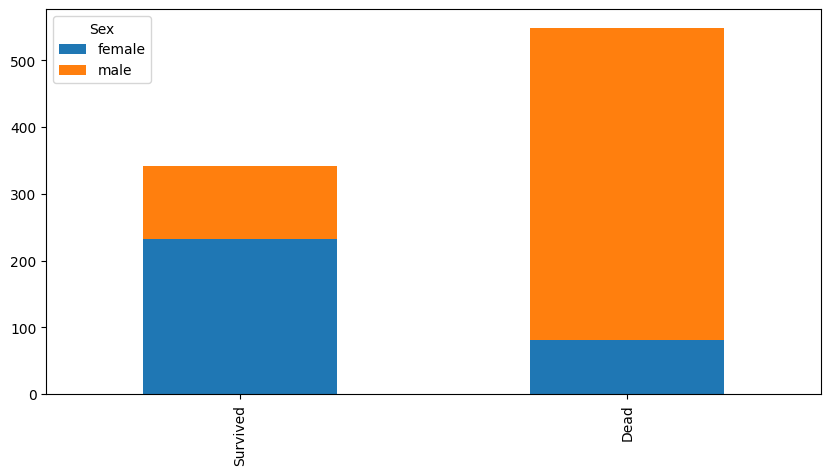

In [16]:
bar_chart("Sex")

<Axes: xlabel='Sex', ylabel='count'>

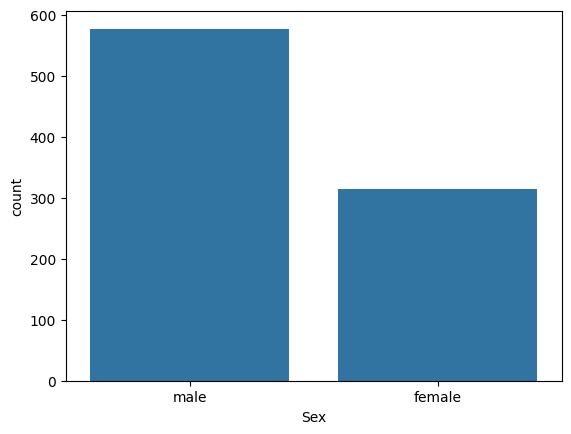

In [17]:
sns.countplot(x="Sex",data=df)

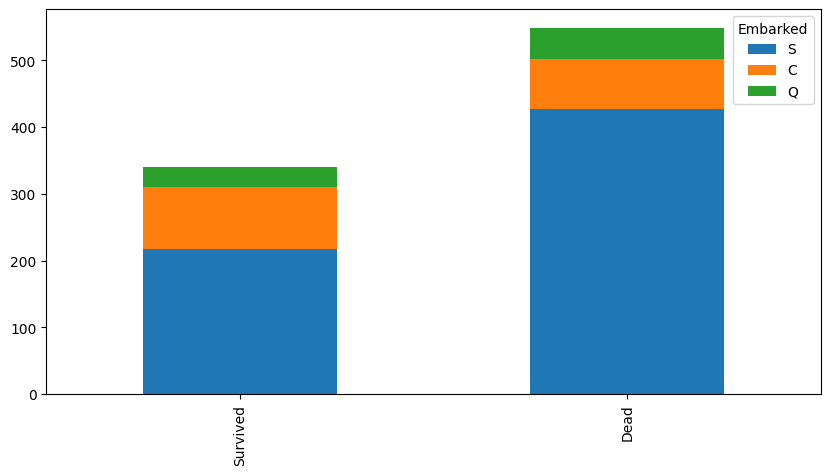

In [18]:
bar_chart("Embarked")

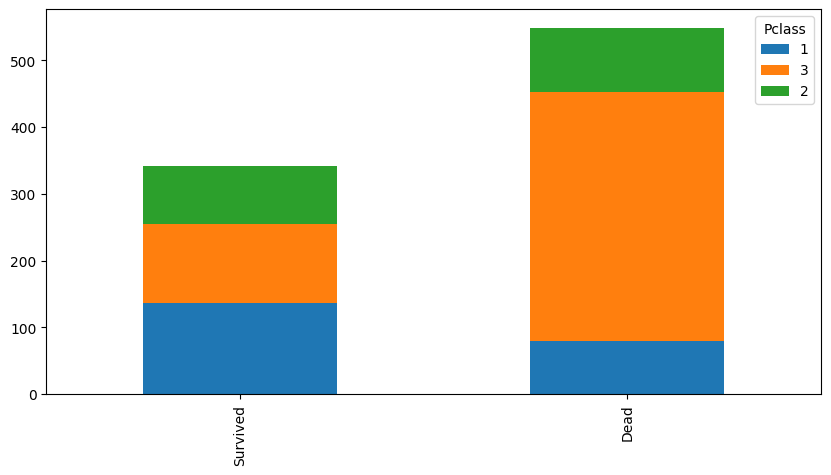

In [19]:
bar_chart("Pclass")

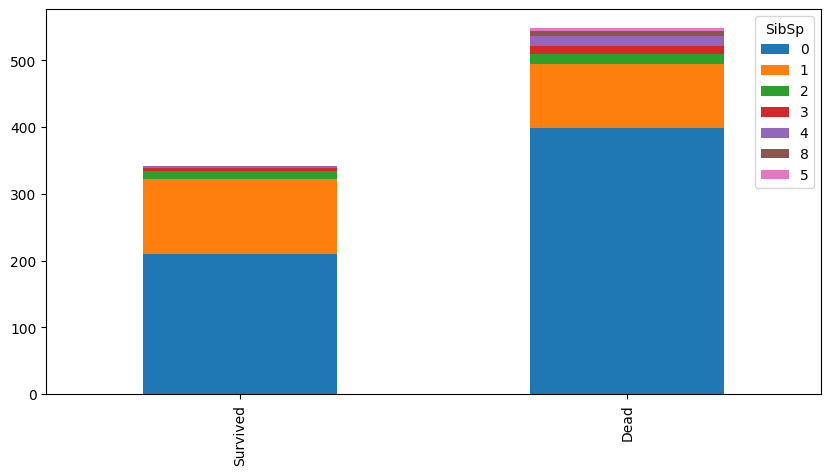

In [20]:
bar_chart("SibSp")

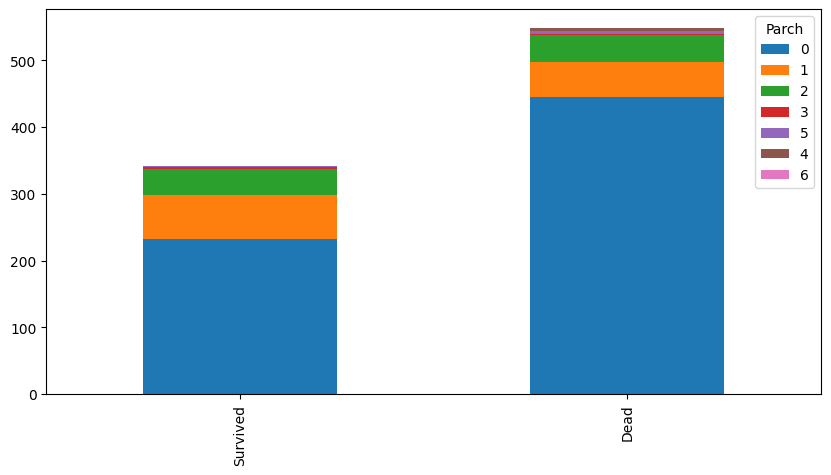

In [21]:
bar_chart("Parch")

Text(0, 0.5, 'Numbers')

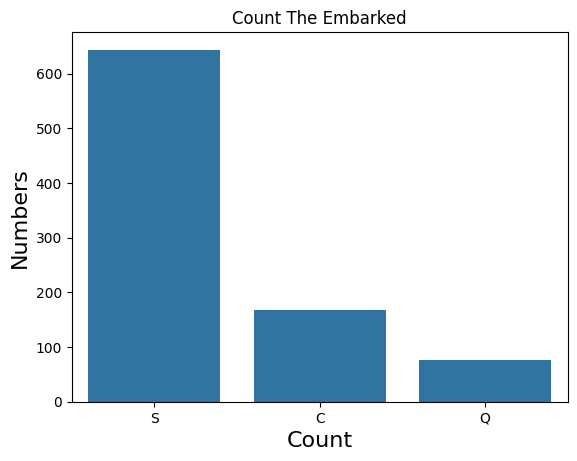

In [22]:
sns.countplot(x="Embarked",data=df)
plt.title("Count The Embarked")
plt.xlabel("Count",fontsize=16,c="k")
plt.ylabel("Numbers",fontsize=16,c="k")


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

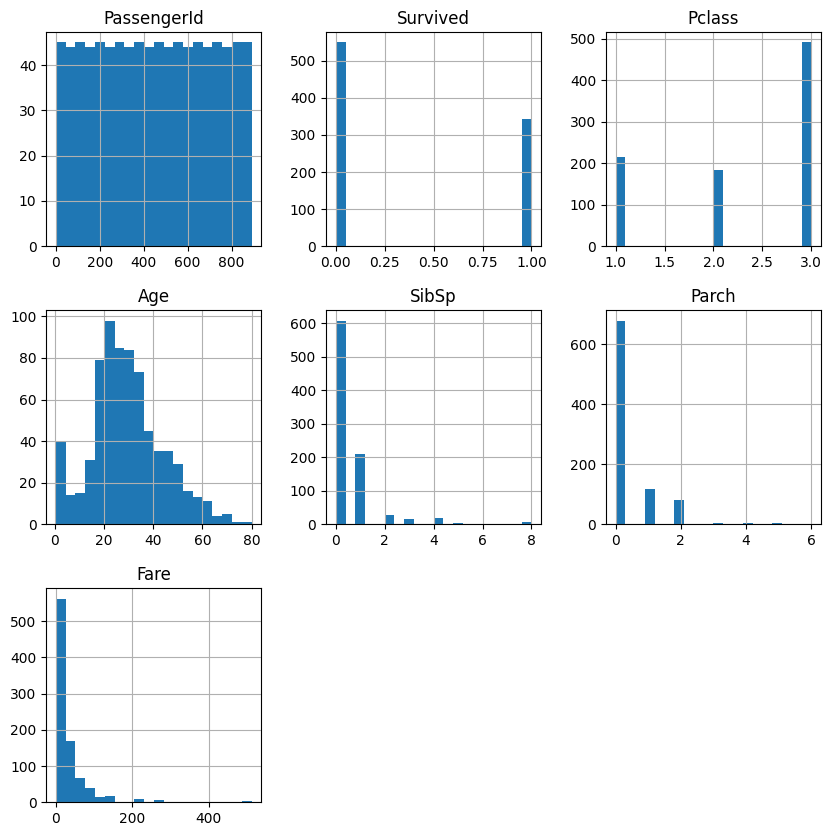

In [23]:
df.hist(bins=20,figsize=(10,10))

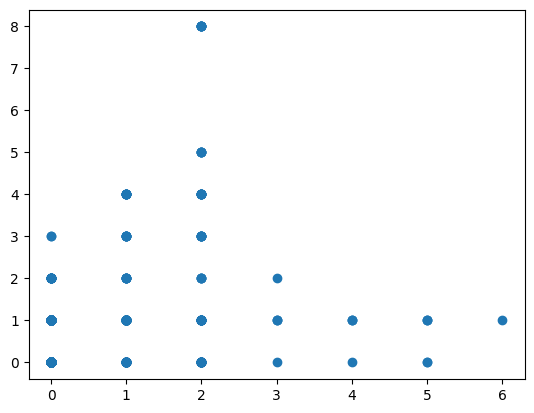

In [24]:
plt.scatter(df["Parch"],df["SibSp"])

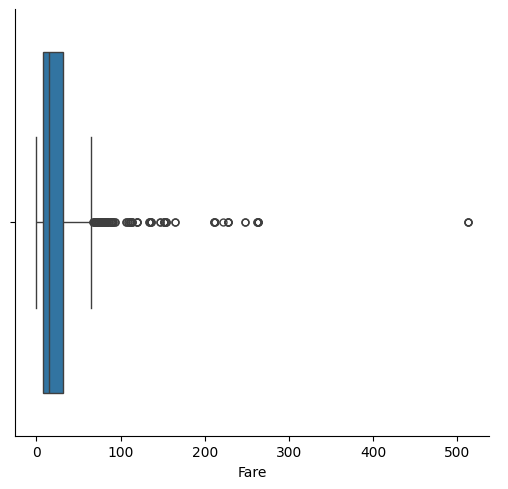

In [25]:
sns.catplot(x="Fare",data=df,kind="box")

<Axes: >

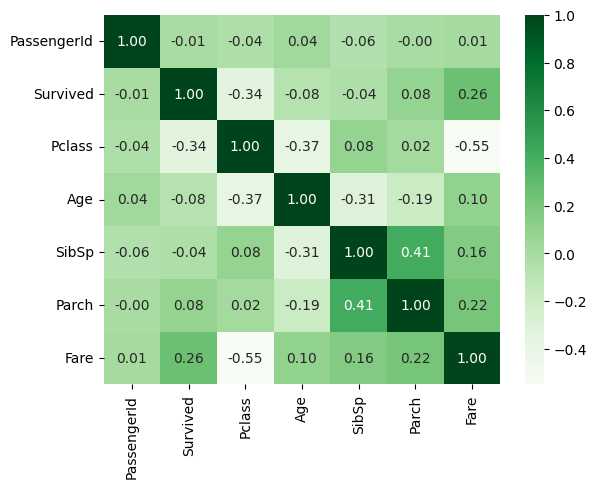

In [26]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="Greens")

<ipython-input-27-6d16edb9174c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"],color="b")


<Axes: xlabel='Fare', ylabel='Density'>

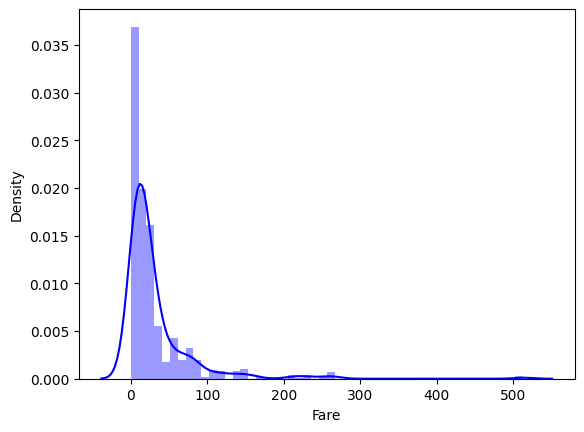

In [27]:
sns.distplot(df["Fare"],color="b")

<ipython-input-28-bbd5adb91596>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"],color="g")


<Axes: xlabel='Fare', ylabel='Density'>

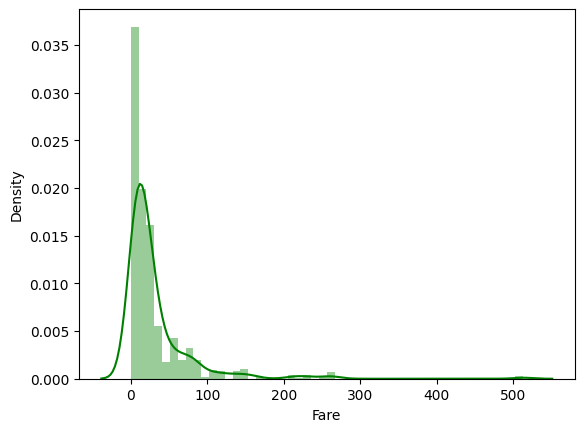

In [28]:
sns.distplot(df["Fare"],color="g")

(array([0.63075196, 0.82154882, 0.89674523, 0.94051627, 0.95735129,
        0.97530864, 0.97755331, 0.97755331, 0.98765432, 0.98989899,
        0.996633  , 0.996633  , 0.996633  , 0.996633  , 0.996633  ,
        0.996633  , 0.996633  , 0.996633  , 0.996633  , 1.        ]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

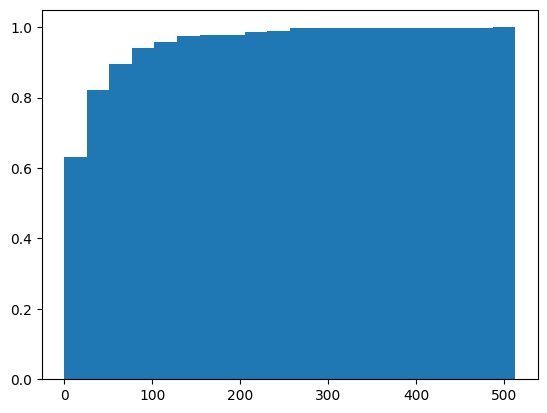

In [29]:
plt.hist(df["Fare"],density=True,cumulative=True,bins=20)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


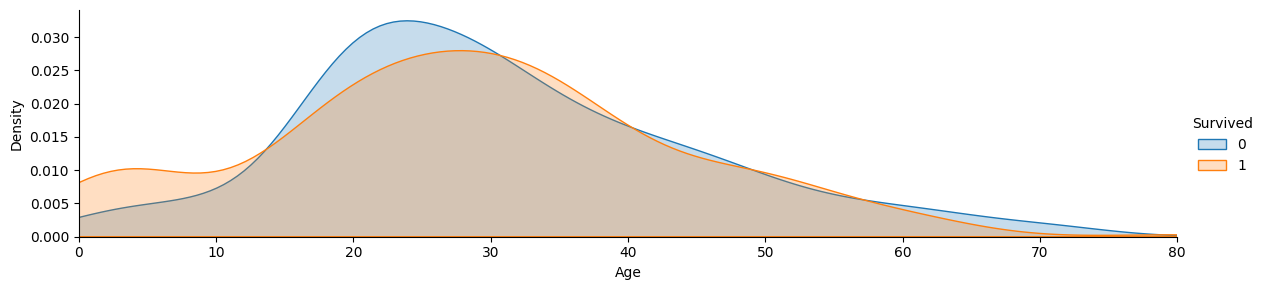

In [30]:

facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


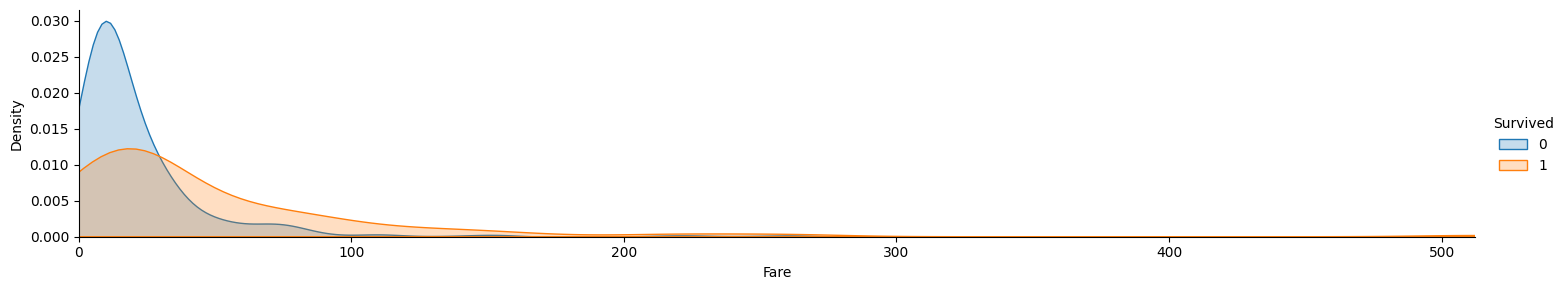

In [31]:
facet=sns.FacetGrid(df,hue="Survived",aspect=5)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,df["Fare"].max()))
facet.add_legend()
plt.show()


In [32]:
df_data=[df]
for dataset in df_data:
    dataset["title"]=dataset["Name"].str.extract("([A-Za-z]+)\.",expand=False)

In [33]:
df["title"].value_counts()

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [34]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Mlle":3,"Major":3,"Col":3,
               "Countess":3,"Capt":3,"Ms":3,"Sir":3
               ,"Lady":3,"Mme":3,"Don":3,"Jonkheer":3}
for dataset in df_data:
    dataset["title"]=dataset["title"].map(title_mapping)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [36]:
df=df.drop(["Name","Cabin","Ticket"],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,3
887,888,1,1,female,19.0,0,0,30.0000,S,1
888,889,0,3,female,NaN,1,2,23.4500,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [37]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,3
887,888,1,1,female,19.0,0,0,30.0000,S,1
888,889,0,3,female,NaN,1,2,23.4500,S,1
889,890,1,1,male,26.0,0,0,30.0000,C,0


In [38]:
Encoder=LabelEncoder()
df["Sex"]=Encoder.fit_transform(df["Sex"])
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [39]:
Encoder=LabelEncoder()
df["Embarked"]=Encoder.fit_transform(df["Embarked"])
df["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [40]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,1,22.0,1,0,7.2500,2,0
1,2,1,1,0,38.0,1,0,71.2833,0,2
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2,3
887,888,1,1,0,19.0,0,0,30.0000,2,1
888,889,0,3,0,NaN,1,2,23.4500,2,1
889,890,1,1,1,26.0,0,0,30.0000,0,0


In [41]:
imputer=SimpleImputer(strategy="median")
imputed_df=imputer.fit_transform(df)
imputed_df=pd.DataFrame(imputed_df,columns=df.columns)
imputed_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,1.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0,3.0
887,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0,1.0
888,889.0,0.0,3.0,0.0,28.0,1.0,2.0,23.4500,2.0,1.0
889,890.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0


In [42]:
imputed_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
title          0
dtype: int64

In [43]:
imputed_df.shape

(891, 10)

In [44]:
x=imputed_df.drop(["Survived"],axis=1)
y=df["Survived"]
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0
1,2.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0
2,3.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,1.0
3,4.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0
4,5.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,0.0
...,...,...,...,...,...,...,...,...,...
886,887.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0,3.0
887,888.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0,1.0
888,889.0,3.0,0.0,28.0,1.0,2.0,23.4500,2.0,1.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0


from matplotlib import pyplot as plt
x['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='PassengerId', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='Pclass', y='Sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='Sex', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('PassengerId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Sex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('PassengerId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Sex')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('PassengerId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['SibSp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('PassengerId', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('SibSp')

from matplotlib import pyplot as plt
x['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x['Sex'].plot(kind='line', figsize=(8, 4), title='Sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [45]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=True,random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (757, 9)
x_test shape (134, 9)
y_train shape (757,)
y_test shape (134,)


In [47]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'title'],
      dtype='object')

**Comparing Performance for the Models**

In [48]:
###KNN
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier(n_neighbors=10)
clf1.fit(x_train,y_train)
clf1.score(x_train,y_train)

0.6935270805812418

In [49]:
y_pred1 = clf1.predict(x_test)
y_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [50]:
from sklearn.metrics import accuracy_score
k=accuracy_score(y_test,y_pred1)
k

0.6567164179104478

In [51]:

from sklearn.metrics import confusion_matrix ,accuracy_score
cm=confusion_matrix(y_test,y_pred1)
print(cm)
accuracy_score=(y_test,y_pred1)

[[72  6]
 [40 16]]


<Axes: >

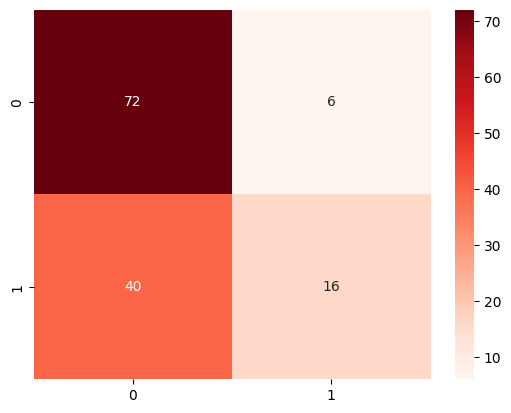

In [52]:
sns.heatmap(cm,annot=True,cmap="Reds")

In [53]:
accuracy_score

(709    1
 439    0
 840    0
 720    1
 39     1
       ..
 494    0
 359    1
 65     1
 481    0
 777    1
 Name: Survived, Length: 134, dtype: int64,
 array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]))

In [54]:
###RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier(n_estimators=10,random_state=0,max_depth=6,max_features=4)
clf2.fit(x_train,y_train)
clf2.score(x_train,y_train)

0.8903566710700133

In [55]:
y_pred2=clf2.predict(x_test)
y_pred2

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1])

In [56]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred2)
a

0.835820895522388

In [57]:
###LogisticRegression
from sklearn.linear_model import LogisticRegression
clfw=LogisticRegression(random_state=0)
clfw.fit(x_train,y_train)
clfw.score(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.809775429326288

In [58]:
y_predw=clfw.predict(x_test)
y_predw

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

In [59]:
from sklearn.metrics import accuracy_score
v=accuracy_score(y_test,y_predw)
v

0.7910447761194029

In [60]:
###DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clfc=DecisionTreeClassifier(random_state=0,max_depth=10,max_features=3)
clfc.fit(x_train,y_train)
clfc.score(x_train,y_train)

0.904887714663144

In [61]:
y_predc=clfc.predict(x_test)
y_predc

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

In [62]:
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,y_predc)
b

0.8283582089552238

In [63]:
###Naive Bayes
from sklearn.naive_bayes import GaussianNB
clfx=GaussianNB()
clfx.fit(x_train,y_train)
clfx.score(x_train,y_train)

0.8110964332892999

In [64]:
y_predx=clfx.predict(x_test)
y_predx

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1])

In [65]:
from sklearn.metrics import accuracy_score
m=accuracy_score(y_test,y_predx)
m

0.7761194029850746